In [1]:
import sys,os
os.chdir('../../')
sys.path.append('./src/data')
sys.path.append('./src/events')
sys.path.append('./src/probability')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from subprocess import call
from IC.importer import *
from IC.processer import *
from IC.main import sim_events
from functions import nufit_params_nsi
from plotter import P_over_E_parameter, oscillogram, nsi_oscillogram
from scipy.stats import chi2
from IC.event_processing import *
import pickle
from DC.event_processing import list_of_params_nsi,get_param_list
from multiprocessing import Pool
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')
np.set_printoptions(linewidth=200)
from plotter import savethesis

In [66]:
IC_range = np.logspace(np.log10(500),4,50)
DC_range = np.logspace(np.log10(5.6),np.log10(56),50)
all_range = np.logspace(np.log10(5.6),4,500)

ett_range = [5e-2,0]
emt_range = [2e-2,0]
ee_range = [2e-1,0]
params = nufit_params_nsi.copy()
ett_params = list_of_params_nsi(params, [params['dm_31']],[params['theta_23']], ett_range, [0], [0],[0])
emt_params = list_of_params_nsi(params, [params['dm_31']],[params['theta_23']], [0], emt_range, [0],[0])
eem_params = list_of_params_nsi(params, [params['dm_31']],[params['theta_23']], [0], [0], ee_range,[0])
eet_params = list_of_params_nsi(params, [params['dm_31']],[params['theta_23']], [0], [0],[0],ee_range)
both_params = list_of_params_nsi(params, [params['dm_31']],[params['theta_23']], ett_range, emt_range, [0],[0])
zenith = -1

In [58]:
'''
Pamam_ett_IC = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,1,:].reshape(len(ett_range),-1)
Pamam_emt_IC = P_over_E_parameter('m',emt_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)

Pmm_ett_IC = P_over_E_parameter('m',ett_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,1,:].reshape(len(ett_range),-1)
Pmm_emt_IC = P_over_E_parameter('m',emt_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)
'''
Pamam_eem_IC = P_over_E_parameter('m',eem_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,1,:].reshape(len(ett_range),-1)
Pamam_eet_IC = P_over_E_parameter('m',eet_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)

Pmm_eem_IC = P_over_E_parameter('m',eem_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,1,:].reshape(len(ett_range),-1)
Pmm_eet_IC = P_over_E_parameter('m',eet_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,1,:].reshape(len(emt_range),-1)

In [67]:
Paeae_eem_IC = P_over_E_parameter('e',eem_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,0,:].reshape(len(ett_range),-1)
Paeae_eet_IC = P_over_E_parameter('e',eet_params,E=all_range, ndim=3, nsi=True, anti=True,zenith=zenith)[:,0,:].reshape(len(emt_range),-1)

Pee_eem_IC = P_over_E_parameter('e',eem_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,0,:].reshape(len(ett_range),-1)
Pee_eet_IC = P_over_E_parameter('e',eet_params,E=all_range, ndim=3, nsi=True, anti=False,zenith=zenith)[:,0,:].reshape(len(emt_range),-1)

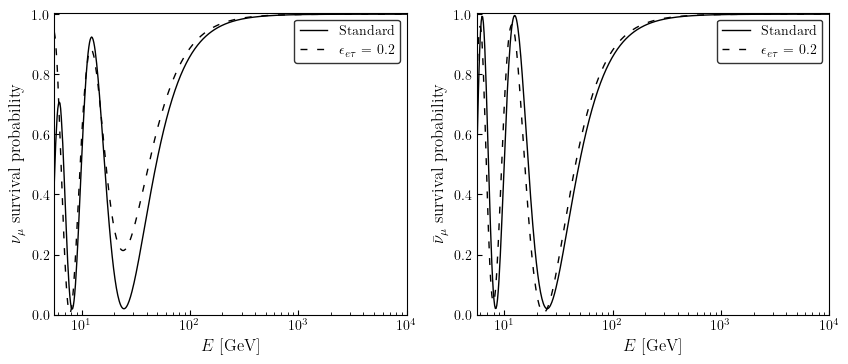

In [60]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax = ax.flatten()
labels = ['Standard',r'$\epsilon_{e\tau}$ = 0.2']

ax[0].plot(all_range, Pmm_eet_IC[1,:], ls='solid', label=labels[0], c='black', lw=1)
ax[0].plot(all_range, Pmm_eet_IC[0,:], ls=(0, (5, 7)), label=labels[1], c='black', lw=1)
ax[1].plot(all_range, Pamam_eet_IC[1,:], ls='solid', label=labels[0], c='black', lw=1)
ax[1].plot(all_range, Pamam_eet_IC[0,:], ls=(0, (5, 7)), label=labels[1], c='black', lw=1)

ax[0].set_xscale('log')
ax[1].set_xscale('log')


ax[0].set_ylim((0,1.005))
ax[1].set_ylim((0,1.005))
ax[0].set_xlim((5.6,10000))
ax[1].set_xlim((5.6,10000))

leg= ax[0].legend()
leg.get_frame().set_edgecolor('k')
leg= ax[1].legend()
leg.get_frame().set_edgecolor('k')

ax[0].set_ylabel(r'$\nu_\mu$ survival probability', fontsize=12)
ax[1].set_ylabel(r'$\bar{\nu}_\mu$ survival probability', fontsize=12)
ax[0].set_xlabel(r'$E$ [GeV]', fontsize=12)
ax[1].set_xlabel(r'$E$ [GeV]', fontsize=12)
ax[0].tick_params(axis='both', direction='in', which='both')
ax[1].tick_params(axis='both', direction='in', which='both')
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args:None
#savethesis(fig,'eet_probs')

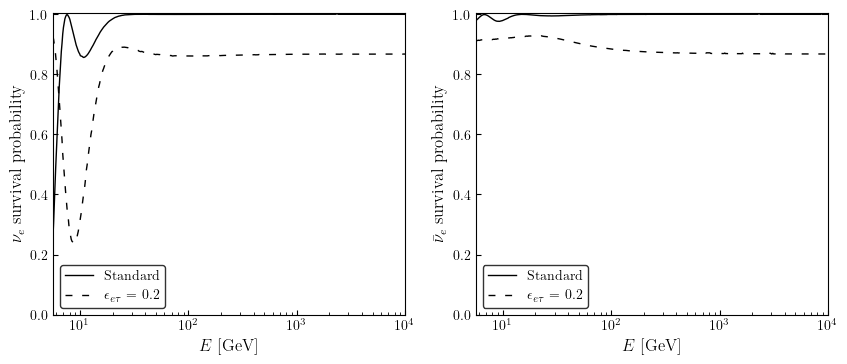

In [68]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax = ax.flatten()
labels = ['Standard',r'$\epsilon_{e\tau}$ = 0.2']

ax[0].plot(all_range, Pee_eet_IC[1,:], ls='solid', label=labels[0], c='black', lw=1)
ax[0].plot(all_range, Pee_eet_IC[0,:], ls=(0, (5, 7)), label=labels[1], c='black', lw=1)
ax[1].plot(all_range, Paeae_eet_IC[1,:], ls='solid', label=labels[0], c='black', lw=1)
ax[1].plot(all_range, Paeae_eet_IC[0,:], ls=(0, (5, 7)), label=labels[1], c='black', lw=1)

ax[0].set_xscale('log')
ax[1].set_xscale('log')


ax[0].set_ylim((0,1.005))
ax[1].set_ylim((0,1.005))
ax[0].set_xlim((5.6,10000))
ax[1].set_xlim((5.6,10000))

leg= ax[0].legend()
leg.get_frame().set_edgecolor('k')
leg= ax[1].legend()
leg.get_frame().set_edgecolor('k')

ax[0].set_ylabel(r'$\nu_e$ survival probability', fontsize=12)
ax[1].set_ylabel(r'$\bar{\nu}_e$ survival probability', fontsize=12)
ax[0].set_xlabel(r'$E$ [GeV]', fontsize=12)
ax[1].set_xlabel(r'$E$ [GeV]', fontsize=12)
ax[0].tick_params(axis='both', direction='in', which='both')
ax[1].tick_params(axis='both', direction='in', which='both')
ax[0].yaxis.get_major_ticks()[-1].draw = lambda *args:None
savethesis(fig,'Pee_eet_probs')

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,8))
ax = ax.flatten()
ls = {0:'dotted', 2:'dotted', 6:'dashed', 8:'dashed'}
#plt.plot(E_range, Pmm_3gen, label='$3 \\nu$', c='black', ls='dashed')
for p in [0,2,6,8]:#range(len(both_params)):
    ax[0].plot(DC_range, Pmm_both_DC[p,:], ls=ls[p], label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(both_params[p]["e_mm"],2)} '+ '$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(both_params[p]["e_mt"],2)}')
    ax[1].plot(IC_range, Pmm_both_IC[p,:], ls=ls[p], label='$\\varepsilon_{\\mu\\mu}$:' +f' {np.round(both_params[p]["e_mm"],2)} ' + '$\\varepsilon_{\\mu\\tau}$:' +f' {np.round(both_params[p]["e_mt"],2)}')
ax[0].plot(DC_range, Pmm_DC, label='3+1',c='red')
ax[1].plot(IC_range, Pmm_IC, label='3+1',c='red')

ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].set_ylim((0,1.01))
ax[1].set_xlim((2e2,1e4))
ax[1].set_ylim((0,1.01))
ax[0].legend()
ax[1].legend()

ax[0].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ DC', fontsize=12)
ax[1].set_title(r'$P_{\bar{\mu}\bar{\mu}}\,$ IC', fontsize=12)

ax[1].annotate(r'$\varepsilon_{\mu\tau} = -0.01$', xy=(6e2, 0.9),
             xycoords='data',
             xytext=(4e2, 0.85),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[1].annotate(r'$\varepsilon_{\mu\tau} = 0.01$', xy=(5e2, 0.98),
             xycoords='data',
             xytext=(2e2, 0.9),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[1].annotate(r'$\varepsilon_{\mu\mu} = -0.01$', xy=(2.4e3, 0.25),
             xycoords='data',
             xytext=(2e3, 0.17),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))



ax[0].annotate(r'$\varepsilon_{\mu\tau} = 0.01$', xy=(4e1, 0.60),
             xycoords='data',
             xytext=(3e1, 0.7),
             fontsize=12,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
ax[0].annotate(r'$\varepsilon_{\mu\tau} = -0.01$', xy=(4.6e1, 0.2),
             xycoords='data',
             xytext=(4e1, 0.1),
             fontsize=10,
             textcoords='data',
             arrowprops=dict(arrowstyle= '->',
                             color='black',
                             lw=1,
                             ls='-'))
                             
